# Pandas and Data Analysis

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
symbols = 'spy goog fb amzn gld nflx'.upper().split()

In [4]:
data = pdr.get_data_yahoo(symbols)['Close']
data.head()

Symbols,SPY,GOOG,FB,AMZN,GLD,NFLX
Date,,,,,,
2016-04-07,203.949997,740.280029,113.639999,591.429993,118.610001,104.449997
2016-04-08,204.500000,739.150024,110.629997,594.599976,118.430000,103.809998
2016-04-11,204.020004,736.099976,108.989998,595.929993,120.029999,102.680000
2016-04-12,205.919998,743.090027,110.610001,603.169983,120.050003,106.980003
2016-04-13,208.000000,751.719971,110.510002,614.820007,118.769997,109.650002


In [6]:
data.describe()

Symbols,SPY,GOOG,FB,AMZN,GLD,NFLX
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,277.954014,1155.293143,180.766796,1690.370881,134.303394,294.800588
std,46.278395,321.810651,46.550096,788.410652,20.985936,135.513185
min,199.600006,668.260010,108.760002,591.429993,107.339996,85.330002
25%,243.164997,930.277496,146.084995,970.062485,119.760000,163.055004
50%,274.819992,1111.660034,176.025002,1683.885010,124.810001,310.724991
75%,300.339996,1297.334991,199.779995,1939.827484,144.429996,371.562492
max,406.359985,2225.550049,308.910004,3531.449951,193.889999,586.340027


In [7]:
data[-252:]

Symbols,SPY,GOOG,FB,AMZN,GLD,NFLX
Date,,,,,,
2020-04-06,264.859985,1186.920044,165.550003,1997.589966,156.880005,379.959991
2020-04-07,265.130005,1186.510010,168.830002,2011.599976,156.039993,372.279999
2020-04-08,274.029999,1210.280029,174.279999,2043.000000,154.649994,371.119995
2020-04-09,278.200012,1211.449951,175.190002,2042.760010,158.690002,370.720001
2020-04-13,275.660004,1217.560059,174.789993,2168.870117,161.410004,396.720001
...,...,...,...,...,...,...
2021-03-30,394.730011,2055.540039,288.000000,3055.290039,157.570007,513.390015
2021-03-31,396.329987,2068.629883,294.529999,3094.080078,159.960007,521.659973
2021-04-01,400.609985,2137.750000,298.660004,3161.000000,161.979996,539.419983


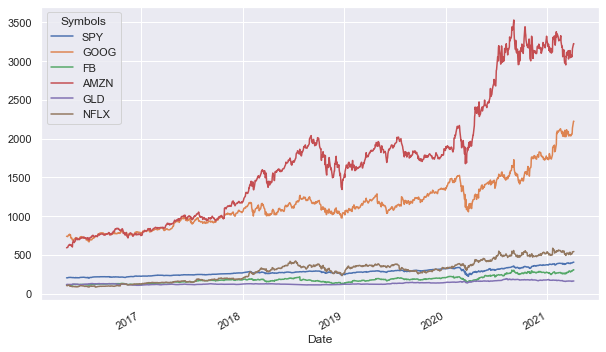

In [10]:
data.plot(figsize=(10,6));

In [15]:
amzn = pd.DataFrame(data['AMZN'])
amzn = round(amzn,2)
amzn.head()

,AMZN
Date,
2016-04-07,591.43
2016-04-08,594.60
2016-04-11,595.93
2016-04-12,603.17
2016-04-13,614.82


In [17]:
day = np.arange(1, len(amzn) + 1)
amzn['day'] = day
amzn = amzn[['day', 'AMZN']]
amzn.head()

,day,AMZN
Date,,
2016-04-07,1,591.43
2016-04-08,2,594.60
2016-04-11,3,595.93
2016-04-12,4,603.17
2016-04-13,5,614.82


In [23]:
amzn['change'] = amzn['AMZN'].diff()
amzn['return'] = np.log(amzn['AMZN']).diff()
amzn['vol'] = amzn['return'].rolling(21).std()
amzn['exp_change'] = amzn['AMZN'] * amzn['vol']
amzn['magnitude'] = amzn['change'] / amzn['exp_change']
amzn[20:30]

,day,AMZN,change,return,vol,exp_change,magnitude
Date,,,,,,,
2016-05-05,21,659.09,-11.81,-0.017760,NaN,NaN,NaN
2016-05-06,22,673.95,14.86,0.022296,0.024566,16.556493,0.897533
2016-05-09,23,679.75,5.80,0.008569,0.024571,16.701925,0.347265
2016-05-10,24,703.07,23.32,0.033731,0.025257,17.757547,1.313244
2016-05-11,25,713.23,10.16,0.014347,0.025281,18.031101,0.563471
2016-05-12,26,717.93,4.70,0.006568,0.025152,18.057517,0.260279
2016-05-13,27,709.92,-8.01,-0.011220,0.025469,18.080796,-0.443011
2016-05-16,28,710.66,0.74,0.001042,0.025491,18.115477,0.040849
2016-05-17,29,695.27,-15.39,-0.021894,0.026107,18.151532,-0.847862


In [26]:
amzn.dropna(inplace=True)

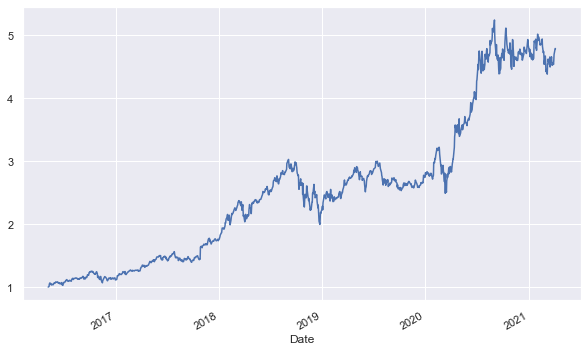

In [33]:
(amzn.AMZN / amzn.AMZN[0]).plot(figsize=(10,6));

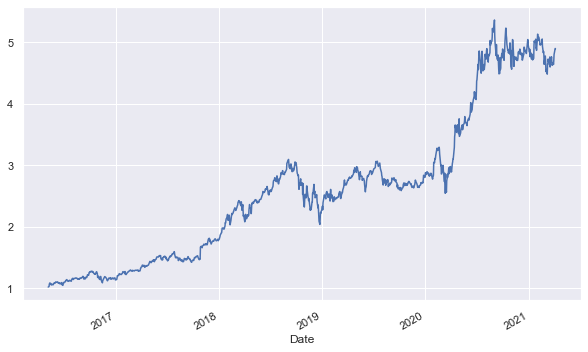

In [35]:
np.exp(amzn['return']).cumprod().plot(figsize=(10,6));

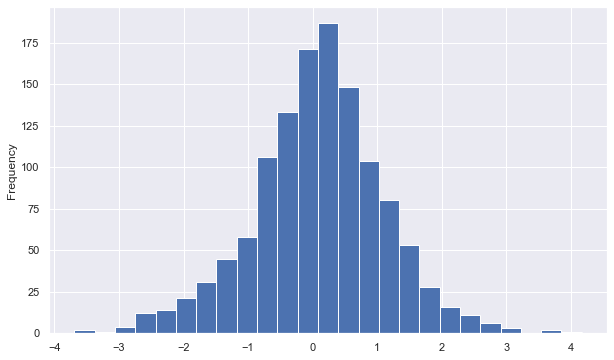

In [37]:
amzn['magnitude'].plot(kind='hist', figsize=(10,6), bins=25);

In [39]:
change = np.log(data).diff()
change.dropna(inplace = True)

In [40]:
change.describe()

Symbols,SPY,GOOG,FB,AMZN,GLD,NFLX
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,0.000548,0.000875,0.000789,0.001349,0.000254,0.001314
std,0.011926,0.016850,0.020551,0.018469,0.008663,0.025343
min,-0.115887,-0.117667,-0.210239,-0.082535,-0.055190,-0.140714
25%,-0.002960,-0.005659,-0.007485,-0.007002,-0.004317,-0.010945
50%,0.000677,0.001218,0.001157,0.001528,0.000618,0.000660
75%,0.005470,0.008842,0.011125,0.010530,0.004735,0.014583
max,0.086731,0.099380,0.102704,0.124131,0.047874,0.174189


In [41]:
corr = change.corr()
corr

Symbols,SPY,GOOG,FB,AMZN,GLD,NFLX
Symbols,,,,,,
SPY,1.000000,0.766254,0.630708,0.611428,0.019029,0.478467
GOOG,0.766254,1.000000,0.683559,0.669915,0.027036,0.518645
FB,0.630708,0.683559,1.000000,0.620659,0.063032,0.469375
AMZN,0.611428,0.669915,0.620659,1.000000,0.060731,0.597718
GLD,0.019029,0.027036,0.063032,0.060731,1.000000,0.063599
NFLX,0.478467,0.518645,0.469375,0.597718,0.063599,1.000000


In [44]:
corr['SPY'].sort_values(ascending=False)

Symbols
SPY     1.000000
GOOG    0.766254
FB      0.630708
AMZN    0.611428
NFLX    0.478467
GLD     0.019029
Name: SPY, dtype: float64

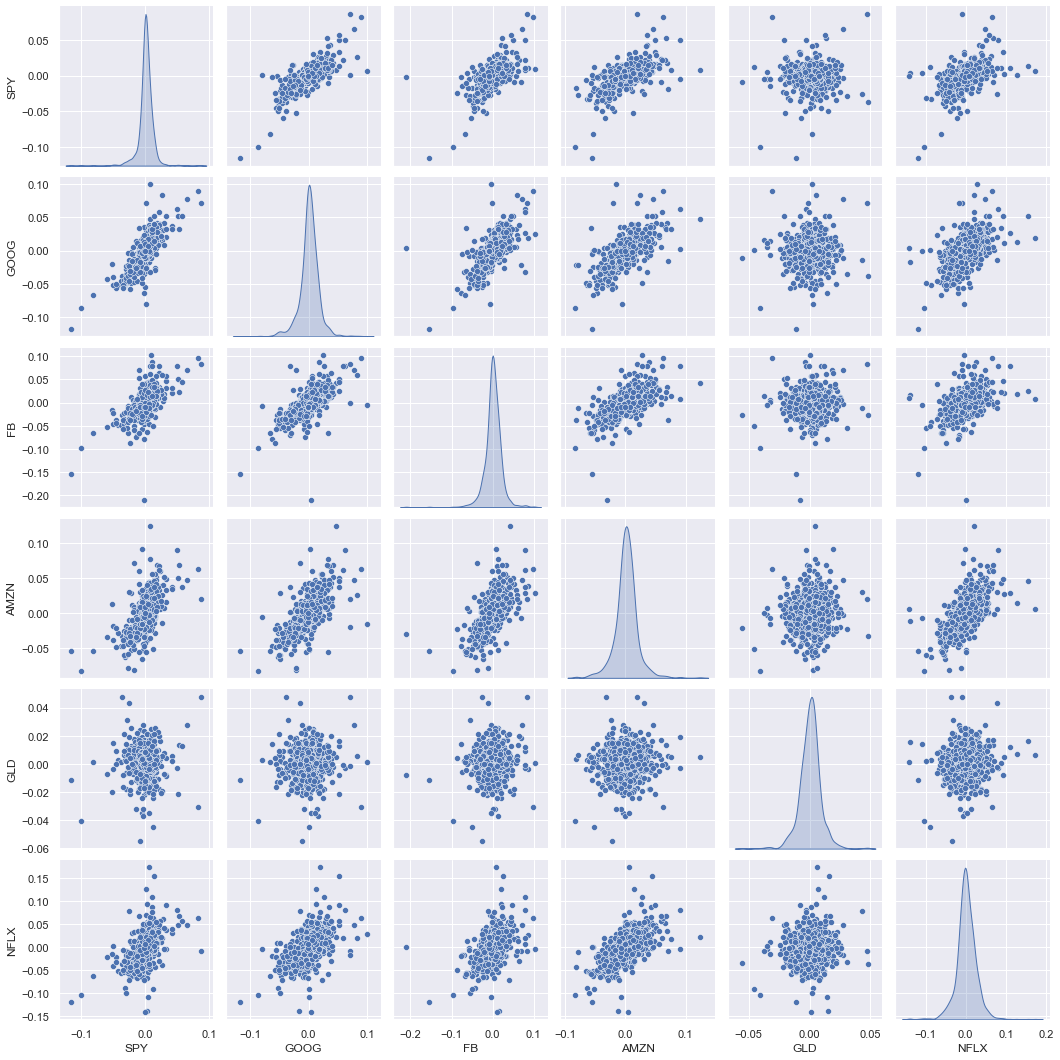

In [47]:
sb.pairplot(change, diag_kind='kde');